# Premier League - Exploratory Data Analysis

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Data Set

In [2]:
epl = pd.read_csv("epl.csv")

In [3]:
epl.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


#### Table Description

#### Div - League Division
#### Date - Match Date
#### HomeTeam - Team playing at the Home Ground
#### AwayTeam - Team playing at the Away ground
#### FTHG - Full-Time Home Team Goals
#### FTAG - Full-Time Away Team Goals
#### FTR - Full-Time Result (H=Home Win, D=Draw, A=Away Win)
#### HTHG - Half-Time Home Team Goals
#### HTAG - Half-Time Away Team Goals
#### HTR - Half-Time Result (H=Home Win, D=Draw, A=Away Win)
#### Season - Premier Leage Season

In [4]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [5]:
epl.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664.000000,9664.000000,8740.000000,8740.000000
mean,1.523903,1.121482,0.685469,0.488444
std,1.301671,1.121667,0.833581,0.710524
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,9.000000,8.000000,5.000000,5.000000


#### Div column has only 1 value E0 and can be dropped
#### Date has high cardinality (expected)
#### Date field has different formats across like 'dd/mm/yy' or 'dd/mm/yyyy'
#### HTHG , HTAG and HTR have 9.6% missing values (924 values in each)
#### FTHG and FTAG has some values as 0s (expected)

### Data Pre-processing

#### Dropping the Division Column

In [6]:
epl.drop(['Div'],axis=1,inplace=True)

In [7]:
epl.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


#### Formatting the Date

In [8]:
epl['New_Date'] = pd.to_datetime(epl.Date , format ='%d/%m/%Y',errors='coerce')
fil = epl.New_Date.isnull()
epl.loc[fil,'New_Date'] = pd.to_datetime(epl[fil]['Date'],errors='coerce')

In [9]:
epl.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,New_Date
0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94,1993-08-14
1,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94,1993-08-14
2,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94,1993-08-14
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94,1993-08-14
4,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94,1993-08-14


In [10]:
print(epl[epl['HTHG'].isnull()]['Season'].value_counts())
print(epl[epl['HTAG'].isnull()]['Season'].value_counts())
print(epl[epl['HTR'].isnull()]['Season'].value_counts())
print(epl['Season'].value_counts())

1993-94    462
1994-95    462
Name: Season, dtype: int64
1993-94    462
1994-95    462
Name: Season, dtype: int64
1993-94    462
1994-95    462
Name: Season, dtype: int64
1994-95    462
1993-94    462
2008-09    380
2012-13    380
2002-03    380
2013-14    380
1999-00    380
2007-08    380
1996-97    380
2017-18    380
2004-05    380
2014-15    380
2015-16    380
2003-04    380
1997-98    380
1998-99    380
2011-12    380
2009-10    380
2005-06    380
2010-11    380
2016-17    380
2000-01    380
2001-02    380
1995-96    380
2006-07    380
Name: Season, dtype: int64


#### The above data shows that there are a few nulls values in the 1993-94 and the 1994-95 season
#### So I have replaced the goal values with 0 and the half time result as draw

In [11]:
epl[['HTHG','HTAG']] = epl[['HTHG','HTAG']].fillna(value=0).astype(int)
epl['HTR'] = epl['HTR'].fillna(value='D')
epl.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,New_Date
0,14/08/93,Arsenal,Coventry,0,3,A,0,0,D,1993-94,1993-08-14
1,14/08/93,Aston Villa,QPR,4,1,H,0,0,D,1993-94,1993-08-14
2,14/08/93,Chelsea,Blackburn,1,2,A,0,0,D,1993-94,1993-08-14
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,0,0,D,1993-94,1993-08-14
4,14/08/93,Man City,Leeds,1,1,D,0,0,D,1993-94,1993-08-14


## Season Level Analysis

### 1.Total Games per Season

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1993-94'),
  Text(1, 0, '1994-95'),
  Text(2, 0, '1995-96'),
  Text(3, 0, '1996-97'),
  Text(4, 0, '1997-98'),
  Text(5, 0, '1998-99'),
  Text(6, 0, '1999-00'),
  Text(7, 0, '2000-01'),
  Text(8, 0, '2001-02'),
  Text(9, 0, '2002-03'),
  Text(10, 0, '2003-04'),
  Text(11, 0, '2004-05'),
  Text(12, 0, '2005-06'),
  Text(13, 0, '2006-07'),
  Text(14, 0, '2007-08'),
  Text(15, 0, '2008-09'),
  Text(16, 0, '2009-10'),
  Text(17, 0, '2010-11'),
  Text(18, 0, '2011-12'),
  Text(19, 0, '2012-13'),
  Text(20, 0, '2013-14'),
  Text(21, 0, '2014-15'),
  Text(22, 0, '2015-16'),
  Text(23, 0, '2016-17'),
  Text(24, 0, '2017-18')])

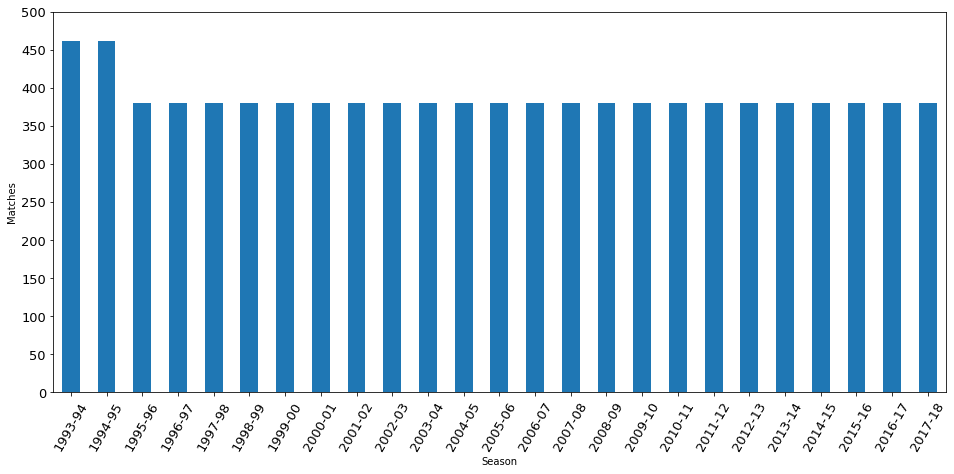

In [12]:
epl.groupby('Season')['Season'].count().plot(kind='bar',fontsize=13,figsize=(16,7),yticks=np.arange(0,501,50))

#epl.title("Matches Played per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.xticks(rotation=60)

#### Observation: The number of games played in the first two seasons are higher than the rest because the teams are reduced to 20 

### 2. Number of teams played 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1993-94'),
  Text(1, 0, '1994-95'),
  Text(2, 0, '1995-96'),
  Text(3, 0, '1996-97'),
  Text(4, 0, '1997-98'),
  Text(5, 0, '1998-99'),
  Text(6, 0, '1999-00'),
  Text(7, 0, '2000-01'),
  Text(8, 0, '2001-02'),
  Text(9, 0, '2002-03'),
  Text(10, 0, '2003-04'),
  Text(11, 0, '2004-05'),
  Text(12, 0, '2005-06'),
  Text(13, 0, '2006-07'),
  Text(14, 0, '2007-08'),
  Text(15, 0, '2008-09'),
  Text(16, 0, '2009-10'),
  Text(17, 0, '2010-11'),
  Text(18, 0, '2011-12'),
  Text(19, 0, '2012-13'),
  Text(20, 0, '2013-14'),
  Text(21, 0, '2014-15'),
  Text(22, 0, '2015-16'),
  Text(23, 0, '2016-17'),
  Text(24, 0, '2017-18')])

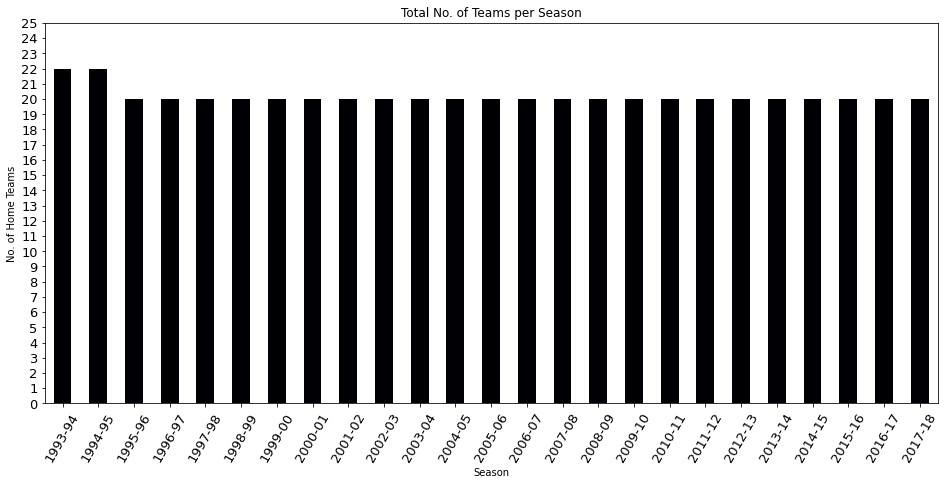

In [13]:
epl.groupby('Season')['HomeTeam'].nunique().plot(kind='bar',colormap='magma',fontsize=13,figsize=(16,7),yticks=np.arange(0, 26))
plt.ylabel('No. of Home Teams')
plt.title("Total No. of Teams per Season")
plt.xticks(rotation=60)

### 3. Home and Away Team goals per season

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1993-94'),
  Text(1, 0, '1994-95'),
  Text(2, 0, '1995-96'),
  Text(3, 0, '1996-97'),
  Text(4, 0, '1997-98'),
  Text(5, 0, '1998-99'),
  Text(6, 0, '1999-00'),
  Text(7, 0, '2000-01'),
  Text(8, 0, '2001-02'),
  Text(9, 0, '2002-03'),
  Text(10, 0, '2003-04'),
  Text(11, 0, '2004-05'),
  Text(12, 0, '2005-06'),
  Text(13, 0, '2006-07'),
  Text(14, 0, '2007-08'),
  Text(15, 0, '2008-09'),
  Text(16, 0, '2009-10'),
  Text(17, 0, '2010-11'),
  Text(18, 0, '2011-12'),
  Text(19, 0, '2012-13'),
  Text(20, 0, '2013-14'),
  Text(21, 0, '2014-15'),
  Text(22, 0, '2015-16'),
  Text(23, 0, '2016-17'),
  Text(24, 0, '2017-18')])

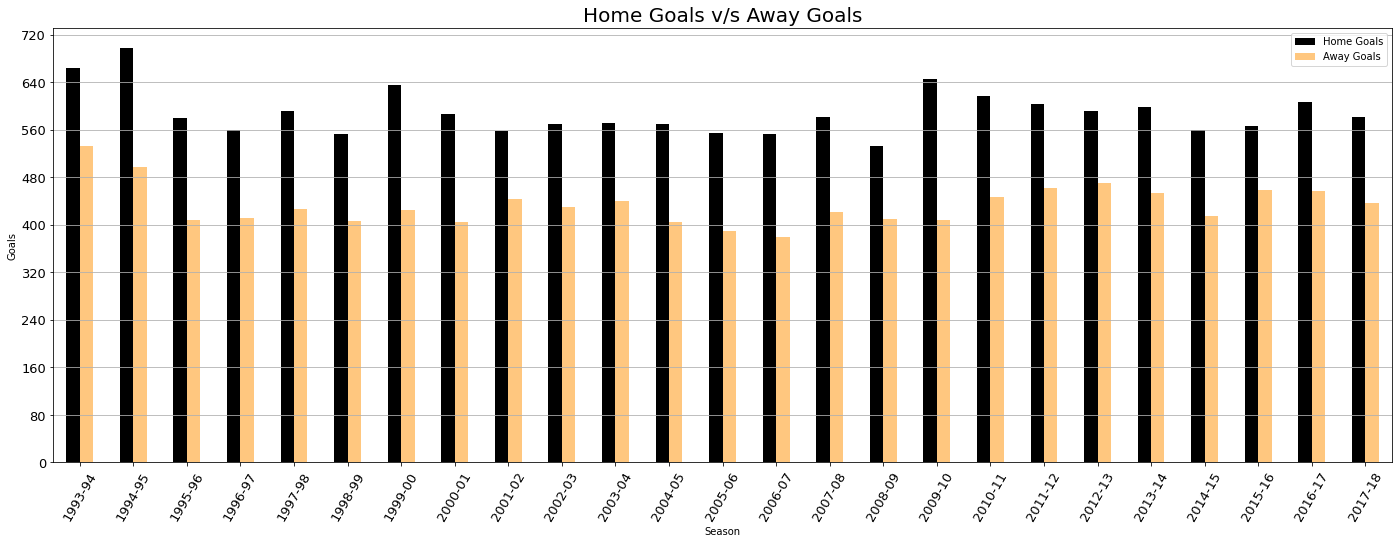

In [14]:
epl.groupby('Season')[['FTHG','FTAG']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),yticks=np.arange(0,721,80),colormap='copper')
plt.grid(axis='y')
plt.ylabel('Goals')
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals v/s Away Goals",fontsize=20)
plt.xticks(rotation=60)

#### Observation: Every season there are more home goals scored due to the possible home advantage 

### Ratio of home goals to away goals

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1993-94'),
  Text(1, 0, '1994-95'),
  Text(2, 0, '1995-96'),
  Text(3, 0, '1996-97'),
  Text(4, 0, '1997-98'),
  Text(5, 0, '1998-99'),
  Text(6, 0, '1999-00'),
  Text(7, 0, '2000-01'),
  Text(8, 0, '2001-02'),
  Text(9, 0, '2002-03'),
  Text(10, 0, '2003-04'),
  Text(11, 0, '2004-05'),
  Text(12, 0, '2005-06'),
  Text(13, 0, '2006-07'),
  Text(14, 0, '2007-08'),
  Text(15, 0, '2008-09'),
  Text(16, 0, '2009-10'),
  Text(17, 0, '2010-11'),
  Text(18, 0, '2011-12'),
  Text(19, 0, '2012-13'),
  Text(20, 0, '2013-14'),
  Text(21, 0, '2014-15'),
  Text(22, 0, '2015-16'),
  Text(23, 0, '2016-17'),
  Text(24, 0, '2017-18')])

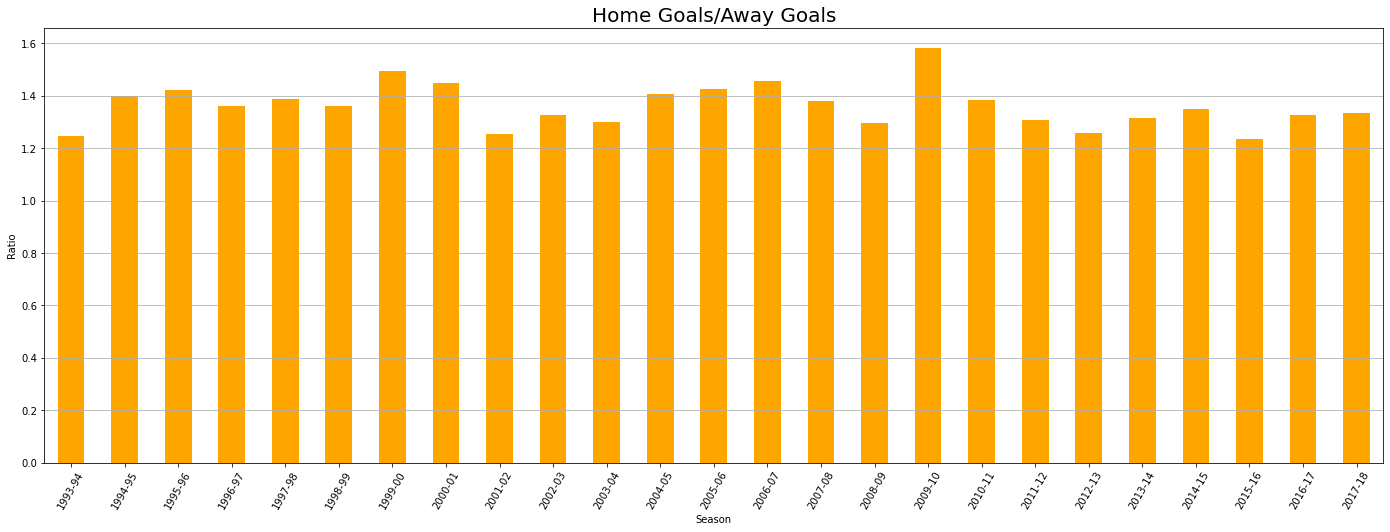

In [15]:
round((epl.groupby('Season')['FTHG'].sum()/epl.groupby('Season')['FTAG'].sum()),3).plot(kind='bar',figsize=(24,8),color='orange')
plt.grid(axis='y')
plt.ylabel("Ratio")
plt.title("Home Goals/Away Goals",fontsize= 20)
plt.xticks(rotation=60)

#### Best Home/Away Goal ratio is for Season 2009-10
#### Worst Home/Away Goal ratio is for Season 2015-16

###  Comebacks per Season
#### Comebacks are defined as to when a team losing at halftime goes on to win the match at full time.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1993-94'),
  Text(1, 0, '1994-95'),
  Text(2, 0, '1995-96'),
  Text(3, 0, '1996-97'),
  Text(4, 0, '1997-98'),
  Text(5, 0, '1998-99'),
  Text(6, 0, '1999-00'),
  Text(7, 0, '2000-01'),
  Text(8, 0, '2001-02'),
  Text(9, 0, '2002-03'),
  Text(10, 0, '2003-04'),
  Text(11, 0, '2004-05'),
  Text(12, 0, '2005-06'),
  Text(13, 0, '2006-07'),
  Text(14, 0, '2007-08'),
  Text(15, 0, '2008-09'),
  Text(16, 0, '2009-10'),
  Text(17, 0, '2010-11'),
  Text(18, 0, '2011-12'),
  Text(19, 0, '2012-13'),
  Text(20, 0, '2013-14'),
  Text(21, 0, '2014-15'),
  Text(22, 0, '2015-16'),
  Text(23, 0, '2016-17'),
  Text(24, 0, '2017-18')])

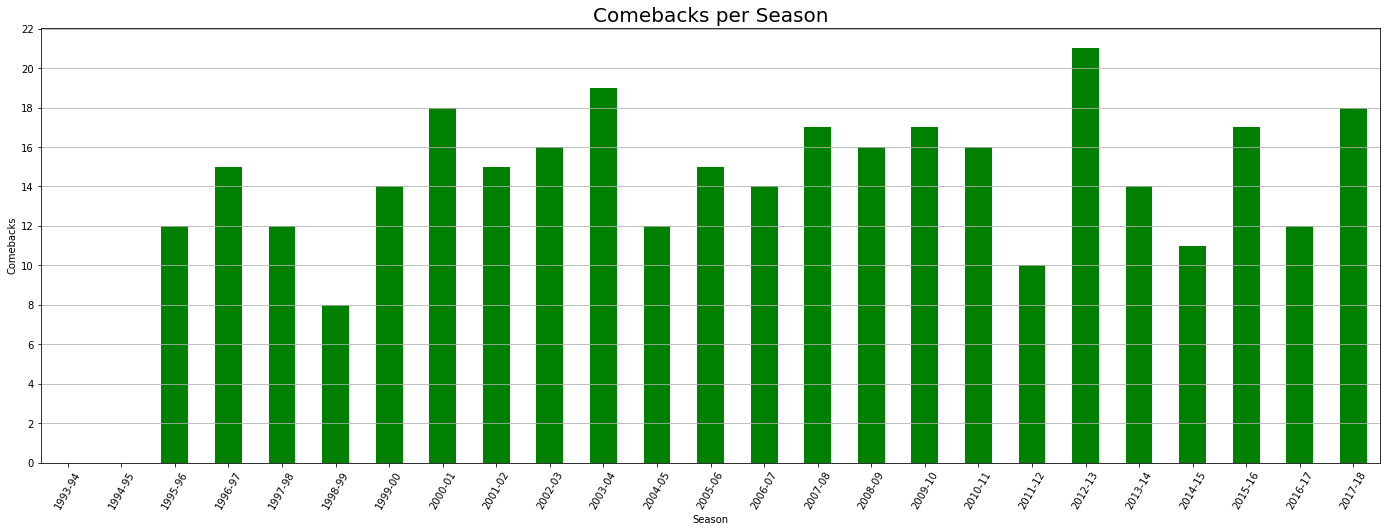

In [16]:
epl['Comeback']=np.where((epl['FTR']!=epl['HTR'])&(epl['FTR']!='D') & (epl['HTR']!='D'),1,0)

epl.groupby('Season')['Comeback'].sum().plot(kind='bar',figsize=(24,8),color='green',yticks=np.arange(0,23,2))
plt.grid(axis='y')
plt.title("Comebacks per Season",fontsize=20)
plt.ylabel('Comebacks')
plt.xticks(rotation=60)

#### No data in initial 2 seasons as the data was manipulated to be all Draws at Half Time (missing data)
#### Best Season in terms of comebacks was season 2012-13 (More games where the haltime result was changed) and the worst season was 1998-99

### Team Level Analysis

#### 1.Total Goals Scored by Each Team over all Seasons

Text(0.5, 1.0, 'Total Goals by Teams')

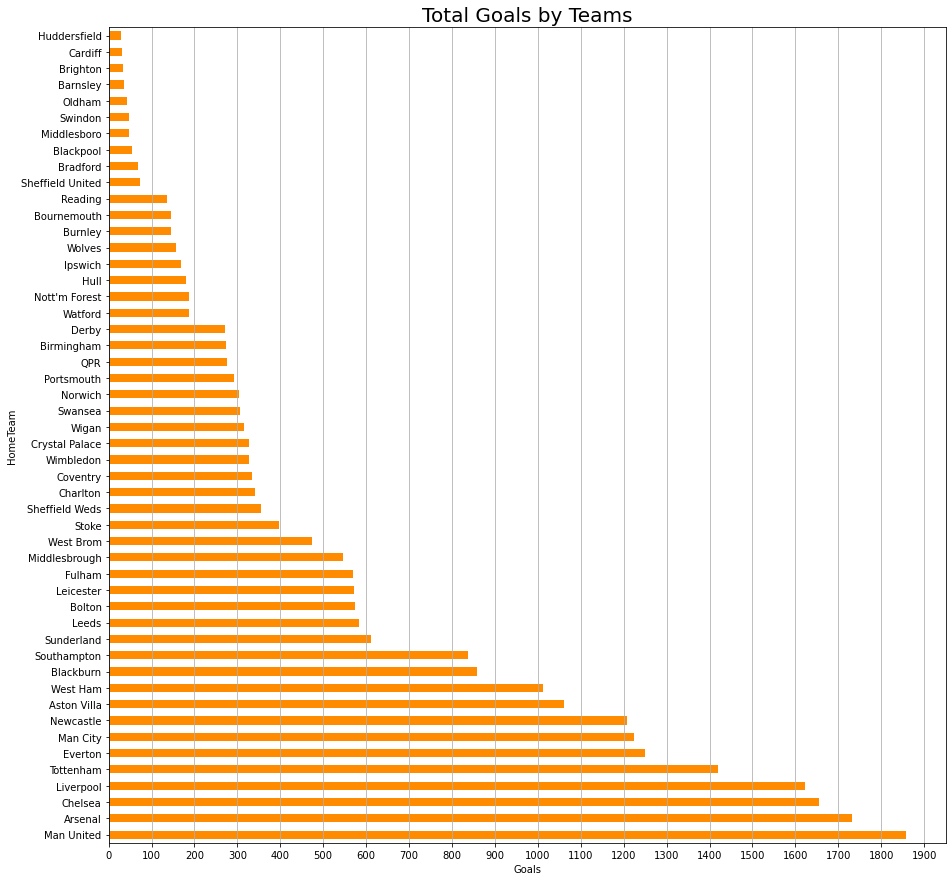

In [17]:
tot_g = epl.groupby('HomeTeam')['FTHG'].sum() + epl.groupby('AwayTeam')['FTAG'].sum()
tot_g.sort_values(ascending=False).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,1901,100),color='darkorange')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Total Goals by Teams",fontsize=20)

#### 2. Home Goals Scored

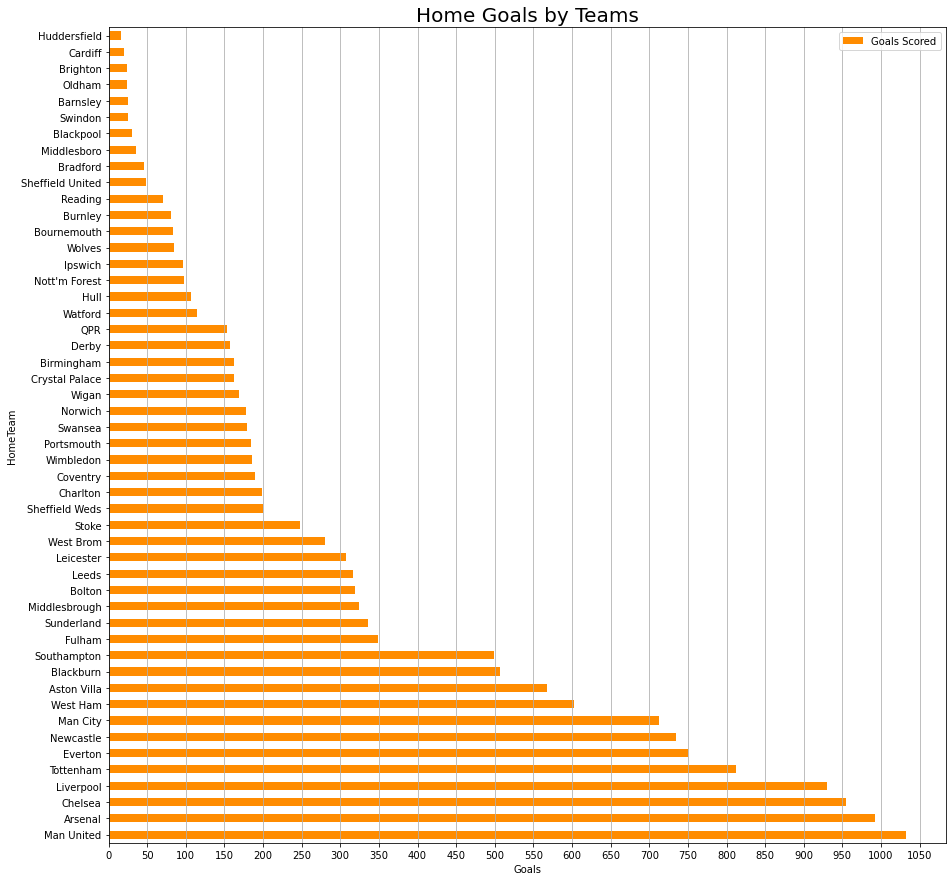

In [18]:
epl.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,1051,50),color='darkorange')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Home Goals by Teams",fontsize=20)
plt.legend(['Goals Scored'])

#### Over the seasons Manchester United has scored most number of goals overall and at Home Ground.
#### Arsenal and Chelsea are at postion 2 and 3 respectively.
#### Huddersfield and Cardiff are the lowest goal scoring teams overall and at Home

### Goals per Home Game

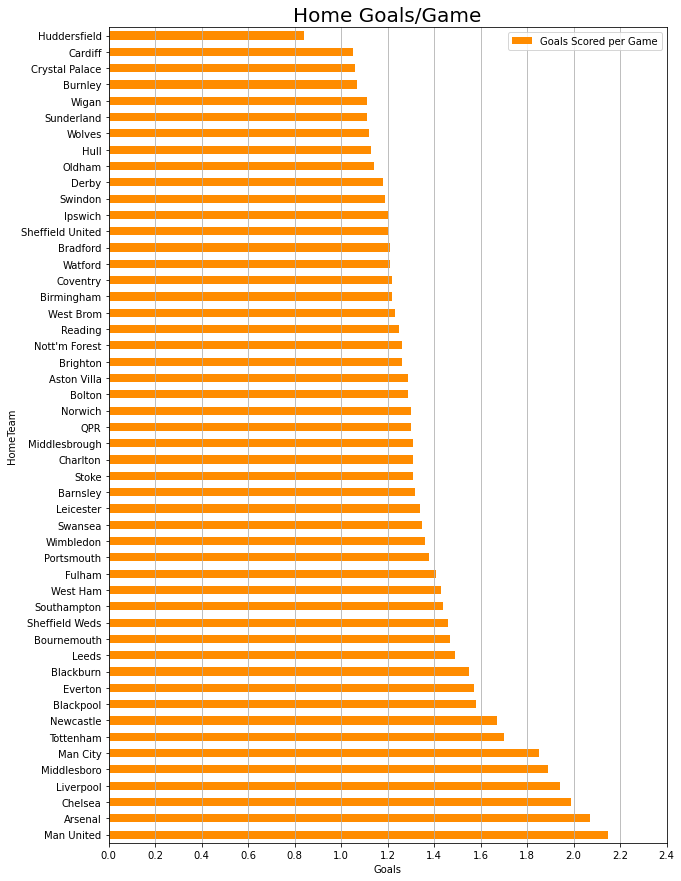

In [19]:
goals_h_game= round(epl.groupby('HomeTeam')['FTHG'].sum()/epl.groupby('HomeTeam')['HomeTeam'].count(),2)
goals_h_game.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,2.5,0.2),color='darkorange')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Home Goals/Game",fontsize=20)
plt.legend(['Goals Scored per Game'])

### 3. Home win percentage 

Text(0.5, 1.0, 'Home Ground Win %')

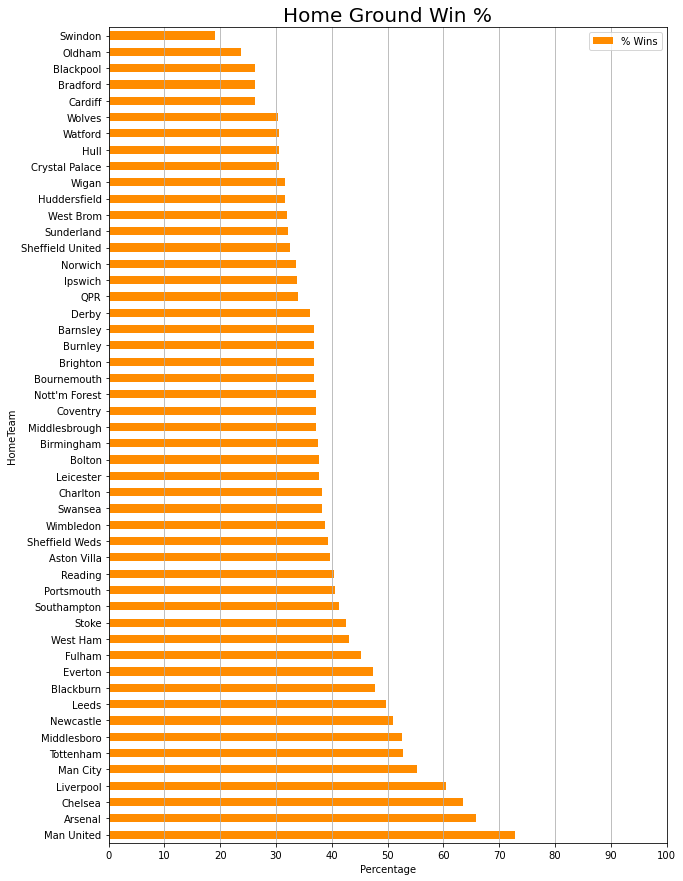

In [20]:
home_win=100*round((epl.loc[epl['FTR']=='H'].groupby('HomeTeam')['FTR'].count()/epl.groupby('HomeTeam')['FTR'].count()),3)
home_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Wins'])
plt.title("Home Ground Win %",fontsize=20)

#### Over the seasons Manchester United has best Home Ground Win% of ~73% which means United has won almost 73/100 matches played at Old Trafford (Home)
#### Arsenal and Chelsea are at postion 2 and 3 respectively.
#### Swindon has worst/least Home Ground Win % of ~20% which means the have won just 20/100 matches played at Home.

### Home Loss Percent 

Text(0.5, 1.0, 'Home Ground Loss %')

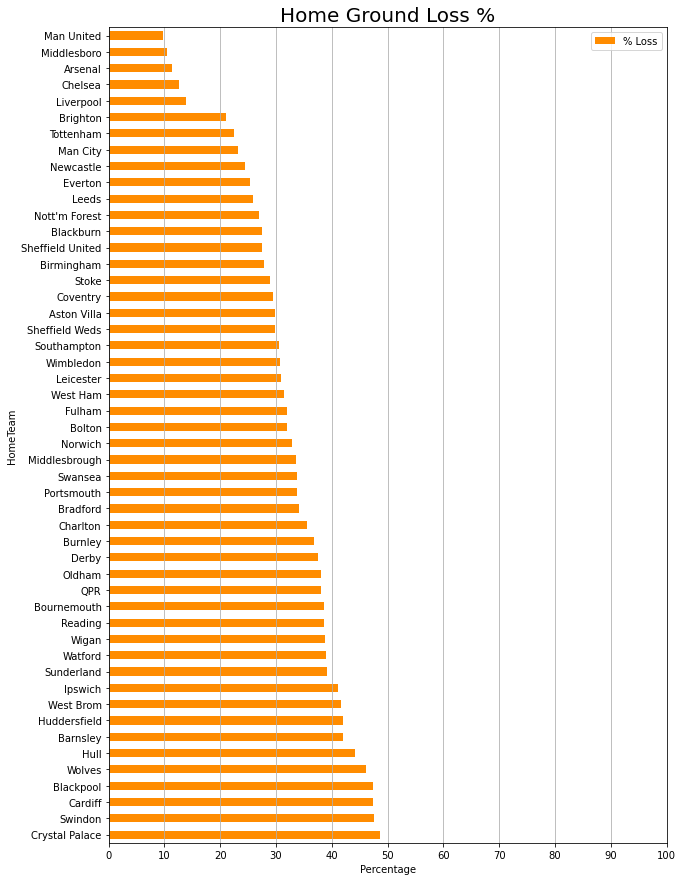

In [21]:
home_loss=100*round((epl.loc[epl['FTR']=='A'].groupby('HomeTeam')['FTR'].count()/epl.groupby('HomeTeam')['FTR'].count()),3)
home_loss.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Loss'])
plt.title("Home Ground Loss %",fontsize=20)

#### Over the seasons Manchester United has least Home Ground Loss% of ~10% which means they have just lost 10/100 games played at Old Trafford(Home)
#### Middlesboro and Arsenal are at postion 2 and 3 respectively.
#### Crystal Palace has highest Home Ground Loss % of ~49% which means they have lost 49/100 games played at Home.

### Home Draw Percentage 

Text(0.5, 1.0, 'Home Ground Draw %')

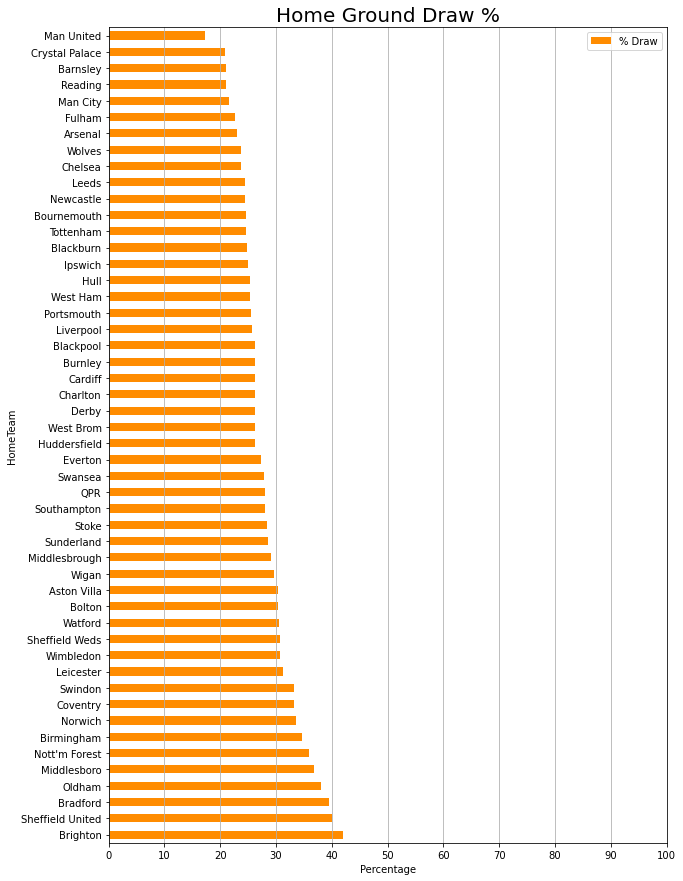

In [22]:
home_draw=100*round((epl.loc[epl['FTR']=='D'].groupby('HomeTeam')['FTR'].count()/epl.groupby('HomeTeam')['FTR'].count()),3)
home_draw.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Draw'])
plt.title("Home Ground Draw %",fontsize=20)

#### Over the seasons Manchester United has least Home Ground Draw% of ~17% which means they have drawn 17/100 games played at Old Trafford(Home)
#### Brighton and Sheffield United are teams with the best(highest) Home Ground Draw % which means they have drawn highest % of games played at home.

### Home Comebacks

Text(0.5, 1.0, 'Home Comebacks')

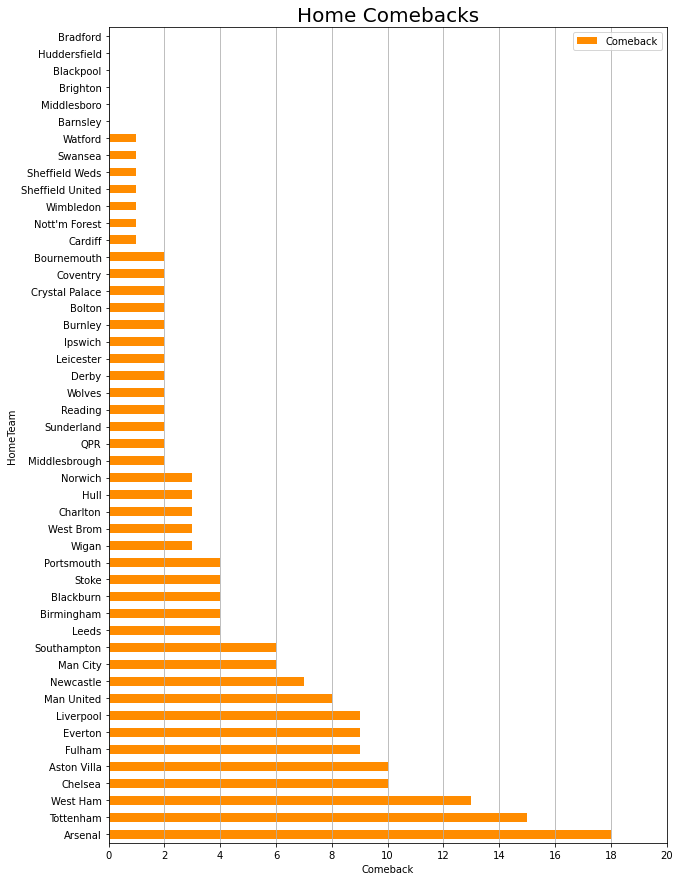

In [23]:
home_cb = epl.loc[(epl['HTR']=='A')].groupby('HomeTeam')['Comeback'].sum()
home_cb.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,21,2),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Comeback')
plt.legend(['Comeback'])
plt.title("Home Comebacks",fontsize=20)

### Away goals scored 

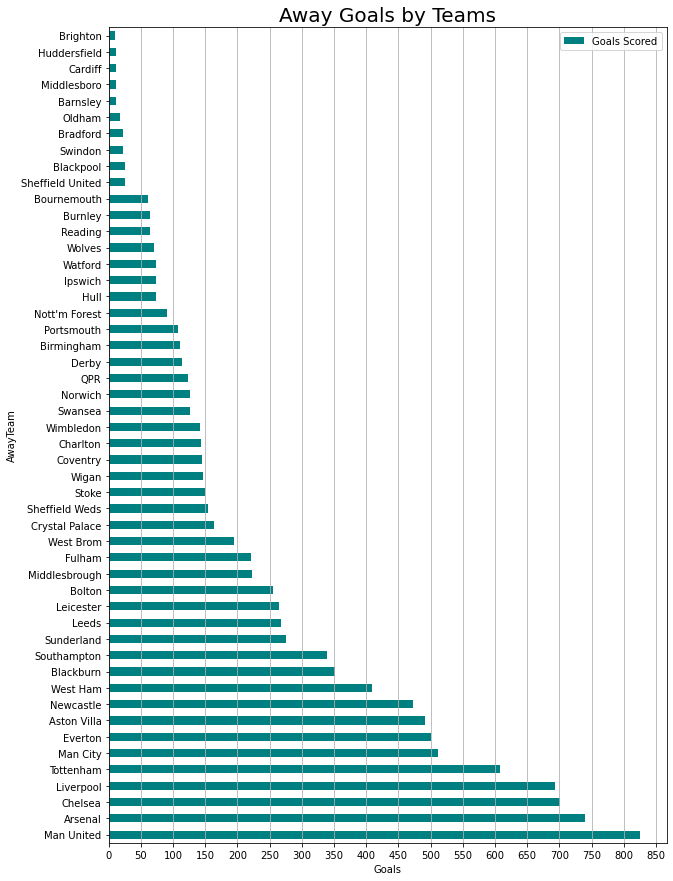

In [24]:
epl.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,851,50),color='teal')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Away Goals by Teams",fontsize=20)
plt.legend(['Goals Scored'])

### Goals per away game

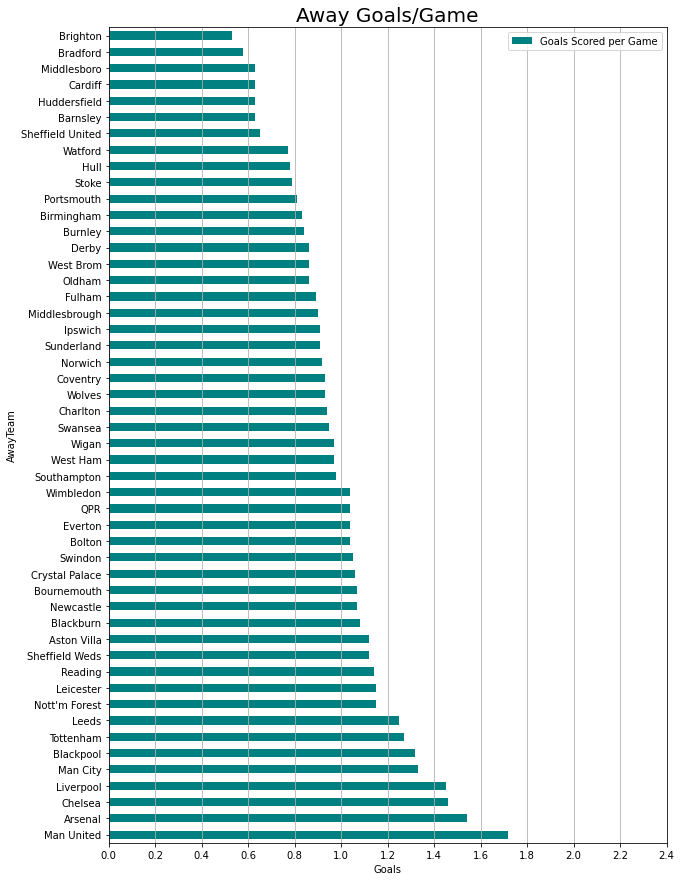

In [25]:
goals_a_game= round(epl.groupby('AwayTeam')['FTAG'].sum()/epl.groupby('AwayTeam')['AwayTeam'].count(),2)
goals_a_game.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,2.5,0.2),color='teal')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Away Goals/Game",fontsize=20)
plt.legend(['Goals Scored per Game'])

### Away win Percenatage

Text(0.5, 1.0, 'Away Ground Win %')

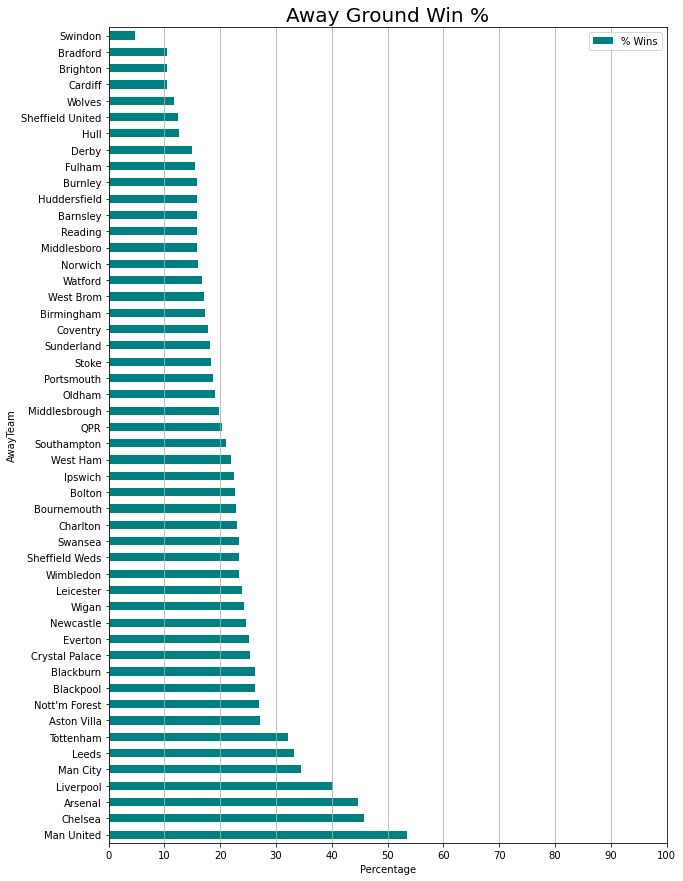

In [26]:
away_win=100*round((epl.loc[epl['FTR']=='A'].groupby('AwayTeam')['FTR'].count()/epl.groupby('AwayTeam')['FTR'].count()),3)
away_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='teal')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Wins'])
plt.title("Away Ground Win %",fontsize=20)

### Away Lose percent

Text(0.5, 1.0, 'Away Ground Loss %')

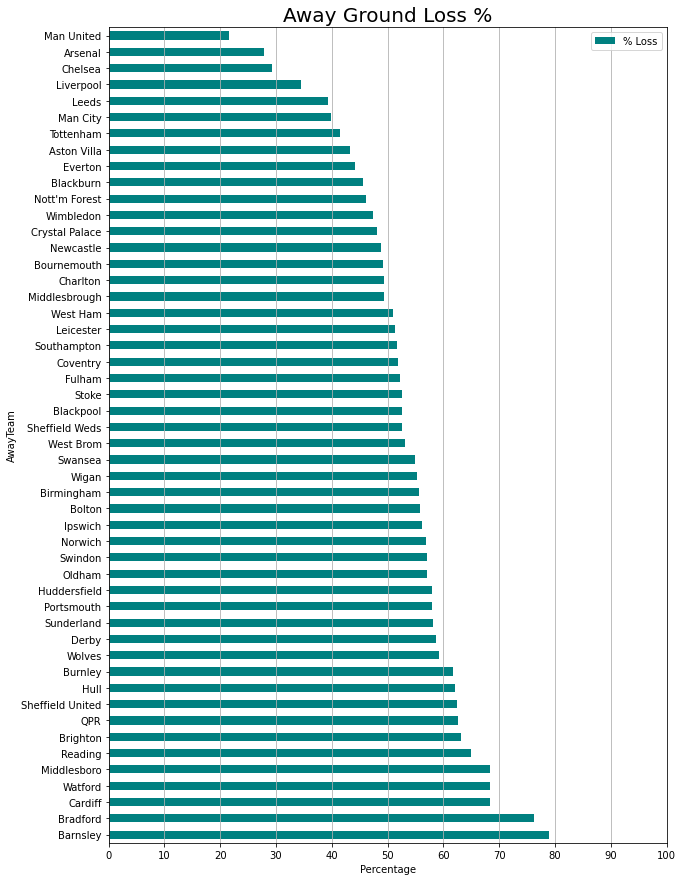

In [27]:
away_win=100*round((epl.loc[epl['FTR']=='H'].groupby('AwayTeam')['FTR'].count()/epl.groupby('AwayTeam')['FTR'].count()),3)
away_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='teal')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Loss'])
plt.title("Away Ground Loss %",fontsize=20)

### Away Draw Percent 

Text(0.5, 1.0, 'Away Ground Draw %')

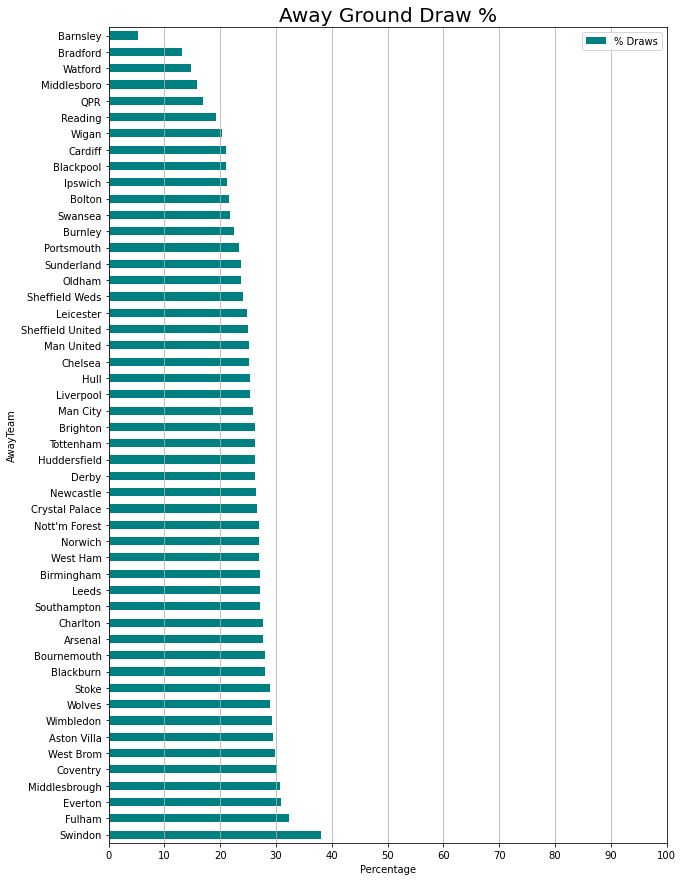

In [28]:
away_win=100*round((epl.loc[epl['FTR']=='D'].groupby('AwayTeam')['FTR'].count()/epl.groupby('AwayTeam')['FTR'].count()),3)
away_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='teal')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Draws'])
plt.title("Away Ground Draw %",fontsize=20)

### Away Comebacks

Text(0.5, 1.0, 'Away Comebacks')

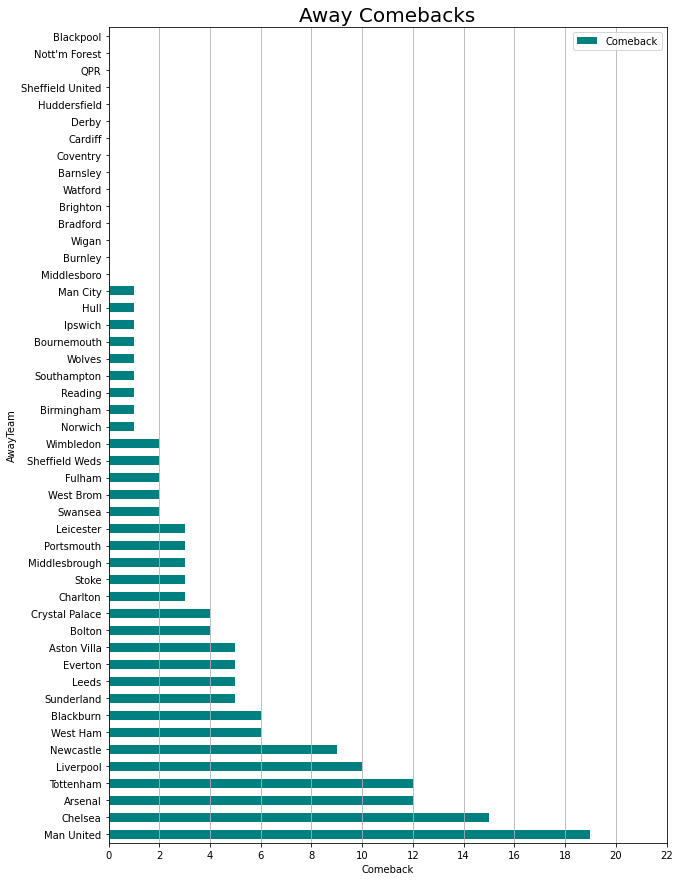

In [29]:
away_cb = epl.loc[(epl['HTR']=='H')].groupby('AwayTeam')['Comeback'].sum()
away_cb.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,23,2),color='teal')
plt.grid(axis='x')
plt.xlabel('Comeback')
plt.legend(['Comeback'])
plt.title("Away Comebacks",fontsize=20)

### Home and away comeback 

Text(0.5, 1.0, 'Home/Total Comebacks')

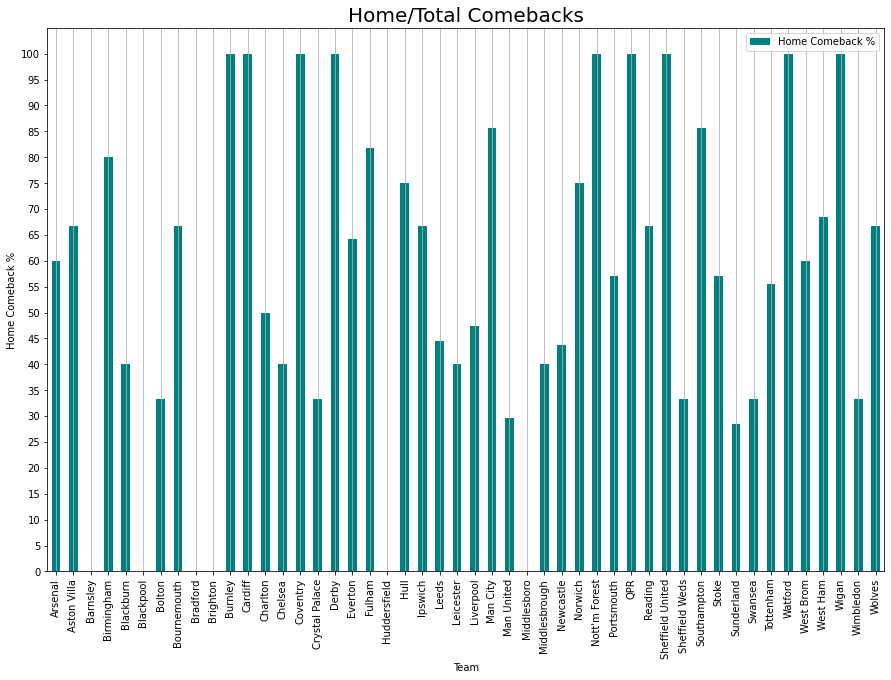

In [30]:
(100*(home_cb/(home_cb+away_cb))).plot(kind='bar',figsize=(15,10),yticks=np.arange(0,101,5),color='teal')
plt.grid(axis='x')
plt.xlabel('Team')
plt.ylabel('Home Comeback %')
plt.legend(['Home Comeback %'])
plt.title("Home/Total Comebacks",fontsize=20)

## Home Game Stats 

In [31]:
#Getting total Home Games, Wins, Draws and Losses
hp = epl.groupby(['Season','HomeTeam'])['FTR'].count().rename("HP")
hw = epl[epl['FTR'] =='H'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HW")
hl = epl[epl['FTR'] =='A'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HL")
hd = epl[epl['FTR'] =='D'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HD")
home_games=pd.concat([hp,hw,hl,hd],axis=1).reset_index()
home_games.fillna(0,inplace=True)
home_games[['HP','HL','HD','HW']]=home_games[['HP','HL','HD','HW']].astype(int)

home_score=epl.groupby(['Season','HomeTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()
home_score.rename(columns={'FTHG':'HG For','FTAG':'HG Against','HTAG':'HG For(Half Time)','HTHG':'HG Against(Half Time)'},inplace=True)

home_df=pd.merge(left=home_games,right=home_score,on=['Season','HomeTeam'],how='left')

In [32]:
hp.head()

Season   HomeTeam   
1993-94  Arsenal        21
         Aston Villa    21
         Blackburn      21
         Chelsea        21
         Coventry       21
Name: HP, dtype: int64

In [33]:
hw.head()

Season   HomeTeam   
1993-94  Arsenal        10
         Aston Villa     8
         Blackburn      14
         Chelsea        11
         Coventry        9
Name: HW, dtype: int64

In [34]:
hl.head()

Season   HomeTeam   
1993-94  Arsenal        3
         Aston Villa    8
         Blackburn      2
         Chelsea        5
         Coventry       5
Name: HL, dtype: int64

In [35]:
hd.head()

Season   HomeTeam   
1993-94  Arsenal        8
         Aston Villa    5
         Blackburn      5
         Chelsea        5
         Coventry       7
Name: HD, dtype: int64

In [36]:
home_games.head()

,Season,HomeTeam,HP,HW,HL,HD
0,1993-94,Arsenal,21,10,3,8
1,1993-94,Aston Villa,21,8,8,5
2,1993-94,Blackburn,21,14,2,5
3,1993-94,Chelsea,21,11,5,5
4,1993-94,Coventry,21,9,5,7


In [37]:
home_score.head()

,Season,HomeTeam,HG Against,HG For,HG For(Half Time),HG Against(Half Time)
0,1993-94,Arsenal,15,25,0,0
1,1993-94,Aston Villa,18,23,0,0
2,1993-94,Blackburn,11,31,0,0
3,1993-94,Chelsea,20,31,0,0
4,1993-94,Coventry,17,23,0,0


In [38]:
home_df.head()

,Season,HomeTeam,HP,HW,HL,HD,HG Against,HG For,HG For(Half Time),HG Against(Half Time)
0,1993-94,Arsenal,21,10,3,8,15,25,0,0
1,1993-94,Aston Villa,21,8,8,5,18,23,0,0
2,1993-94,Blackburn,21,14,2,5,11,31,0,0
3,1993-94,Chelsea,21,11,5,5,20,31,0,0
4,1993-94,Coventry,21,9,5,7,17,23,0,0


## Away Game Stats

In [39]:
ap = epl.groupby(['Season','AwayTeam'])['FTR'].count().rename("AP")
aw = epl[epl['FTR'] =='A'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AW")
al = epl[epl['FTR'] =='H'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AL")
ad = epl[epl['FTR'] =='D'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AD")
away_games=pd.concat([ap,aw,al,ad],axis=1).reset_index()
away_games.fillna(0,inplace=True)   ##NaN comes where theere are 0 games as groupby misses that entry
away_games[['AP','AL','AD','AW']]=away_games[['AP','AL','AD','AW']].astype(int)

away_score=epl.groupby(['Season','AwayTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()
away_score.rename(columns={'FTHG':'AG Against','FTAG':'AG For','HTAG':'AG For(Half Time)','HTHG':'AG Against(Half Time)'},inplace=True)

away_df=pd.merge(left=away_games,right=away_score,on=['Season','AwayTeam'],how='left')

## Points Table for all Seasons 

In [40]:
pt_table = pd.merge(left=home_df,right=away_df,left_on=['Season','HomeTeam'],right_on=['Season','AwayTeam']).drop(['AwayTeam'],axis=1)
pt_table.rename(columns={'HomeTeam':'Team'},inplace=True)
pt_table['Total Played'] = pt_table['HP'] + pt_table['AP']
pt_table['Total Wins'] = pt_table['HW'] + pt_table['AW']
pt_table['Total Loss'] = pt_table['HL'] + pt_table['AL']
pt_table['Total Draw'] = pt_table['HD'] + pt_table['AD']
pt_table['GF'] = pt_table['HG For'] + pt_table['AG For']
pt_table['GA'] = pt_table['HG Against'] + pt_table['AG Against']
pt_table['GD'] = pt_table['GF'] - pt_table['GA']
pt_table['Total_Points'] = 3*pt_table['Total Wins'] + pt_table['Total Draw']  ## 3 Points for a Win and 1 Point for a Draw.

pt_table['Rank']= pt_table.groupby('Season')['Total_Points'].rank(method='min',ascending=False)
pt_table['fin'] = pt_table.groupby(['Season','Rank'])['GD'].rank(method='first',ascending=False)  ## If points are same, use goal difference
pt_table['Rank']=np.where((pt_table['fin'] > 1),(pt_table['Rank']+pt_table['fin'] - 1),pt_table['Rank'])
pt_table.drop('fin',axis=1,inplace=True)

In [41]:
pt_table

,Season,Team,HP,HW,HL,HD,HG Against,HG For,HG For(Half Time),HG Against(Half Time),...,AG Against(Half Time),Total Played,Total Wins,Total Loss,Total Draw,GF,GA,GD,Total_Points,Rank
0,1993-94,Arsenal,21,10,3,8,15,25,0,0,...,0,42,18,7,17,53,28,25,71,4.0
1,1993-94,Aston Villa,21,8,8,5,18,23,0,0,...,0,42,15,15,12,46,50,-4,57,10.0
2,1993-94,Blackburn,21,14,2,5,11,31,0,0,...,0,42,25,8,9,63,36,27,84,2.0
3,1993-94,Chelsea,21,11,5,5,20,31,0,0,...,0,42,13,17,12,49,53,-4,51,14.0
4,1993-94,Coventry,21,9,5,7,17,23,0,0,...,0,42,14,14,14,43,45,-2,56,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2017-18,Swansea,19,6,10,3,24,17,12,6,...,14,38,8,21,9,28,56,-28,33,18.0
500,2017-18,Tottenham,19,13,2,4,16,40,7,14,...,10,38,23,7,8,74,36,38,77,3.0
501,2017-18,Watford,19,7,6,6,31,27,16,10,...,13,38,11,19,8,44,64,-20,41,14.0
502,2017-18,West Brom,19,3,7,9,29,21,13,8,...,7,38,6,19,13,31,56,-25,31,20.0


## Table for 2016-2017

In [42]:
pt_table[pt_table['Season']=='2016-17'].sort_values(by='Rank')[['Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]

,Team,Total Played,Total Wins,Total Loss,Total Draw,GF,GA,GD,Total_Points,Rank
467,Chelsea,38,30,5,3,85,33,52,93,1.0
480,Tottenham,38,26,4,8,86,26,60,86,2.0
473,Man City,38,23,6,9,80,39,41,78,3.0
472,Liverpool,38,22,6,10,78,42,36,76,4.0
464,Arsenal,38,23,9,6,77,44,33,75,5.0
474,Man United,38,18,5,15,54,29,25,69,6.0
469,Everton,38,17,11,10,62,44,18,61,7.0
476,Southampton,38,12,16,10,41,48,-7,46,8.0
465,Bournemouth,38,12,16,10,55,67,-12,46,9.0
482,West Brom,38,12,17,9,43,51,-8,45,10.0


## Best and Worst Stats 

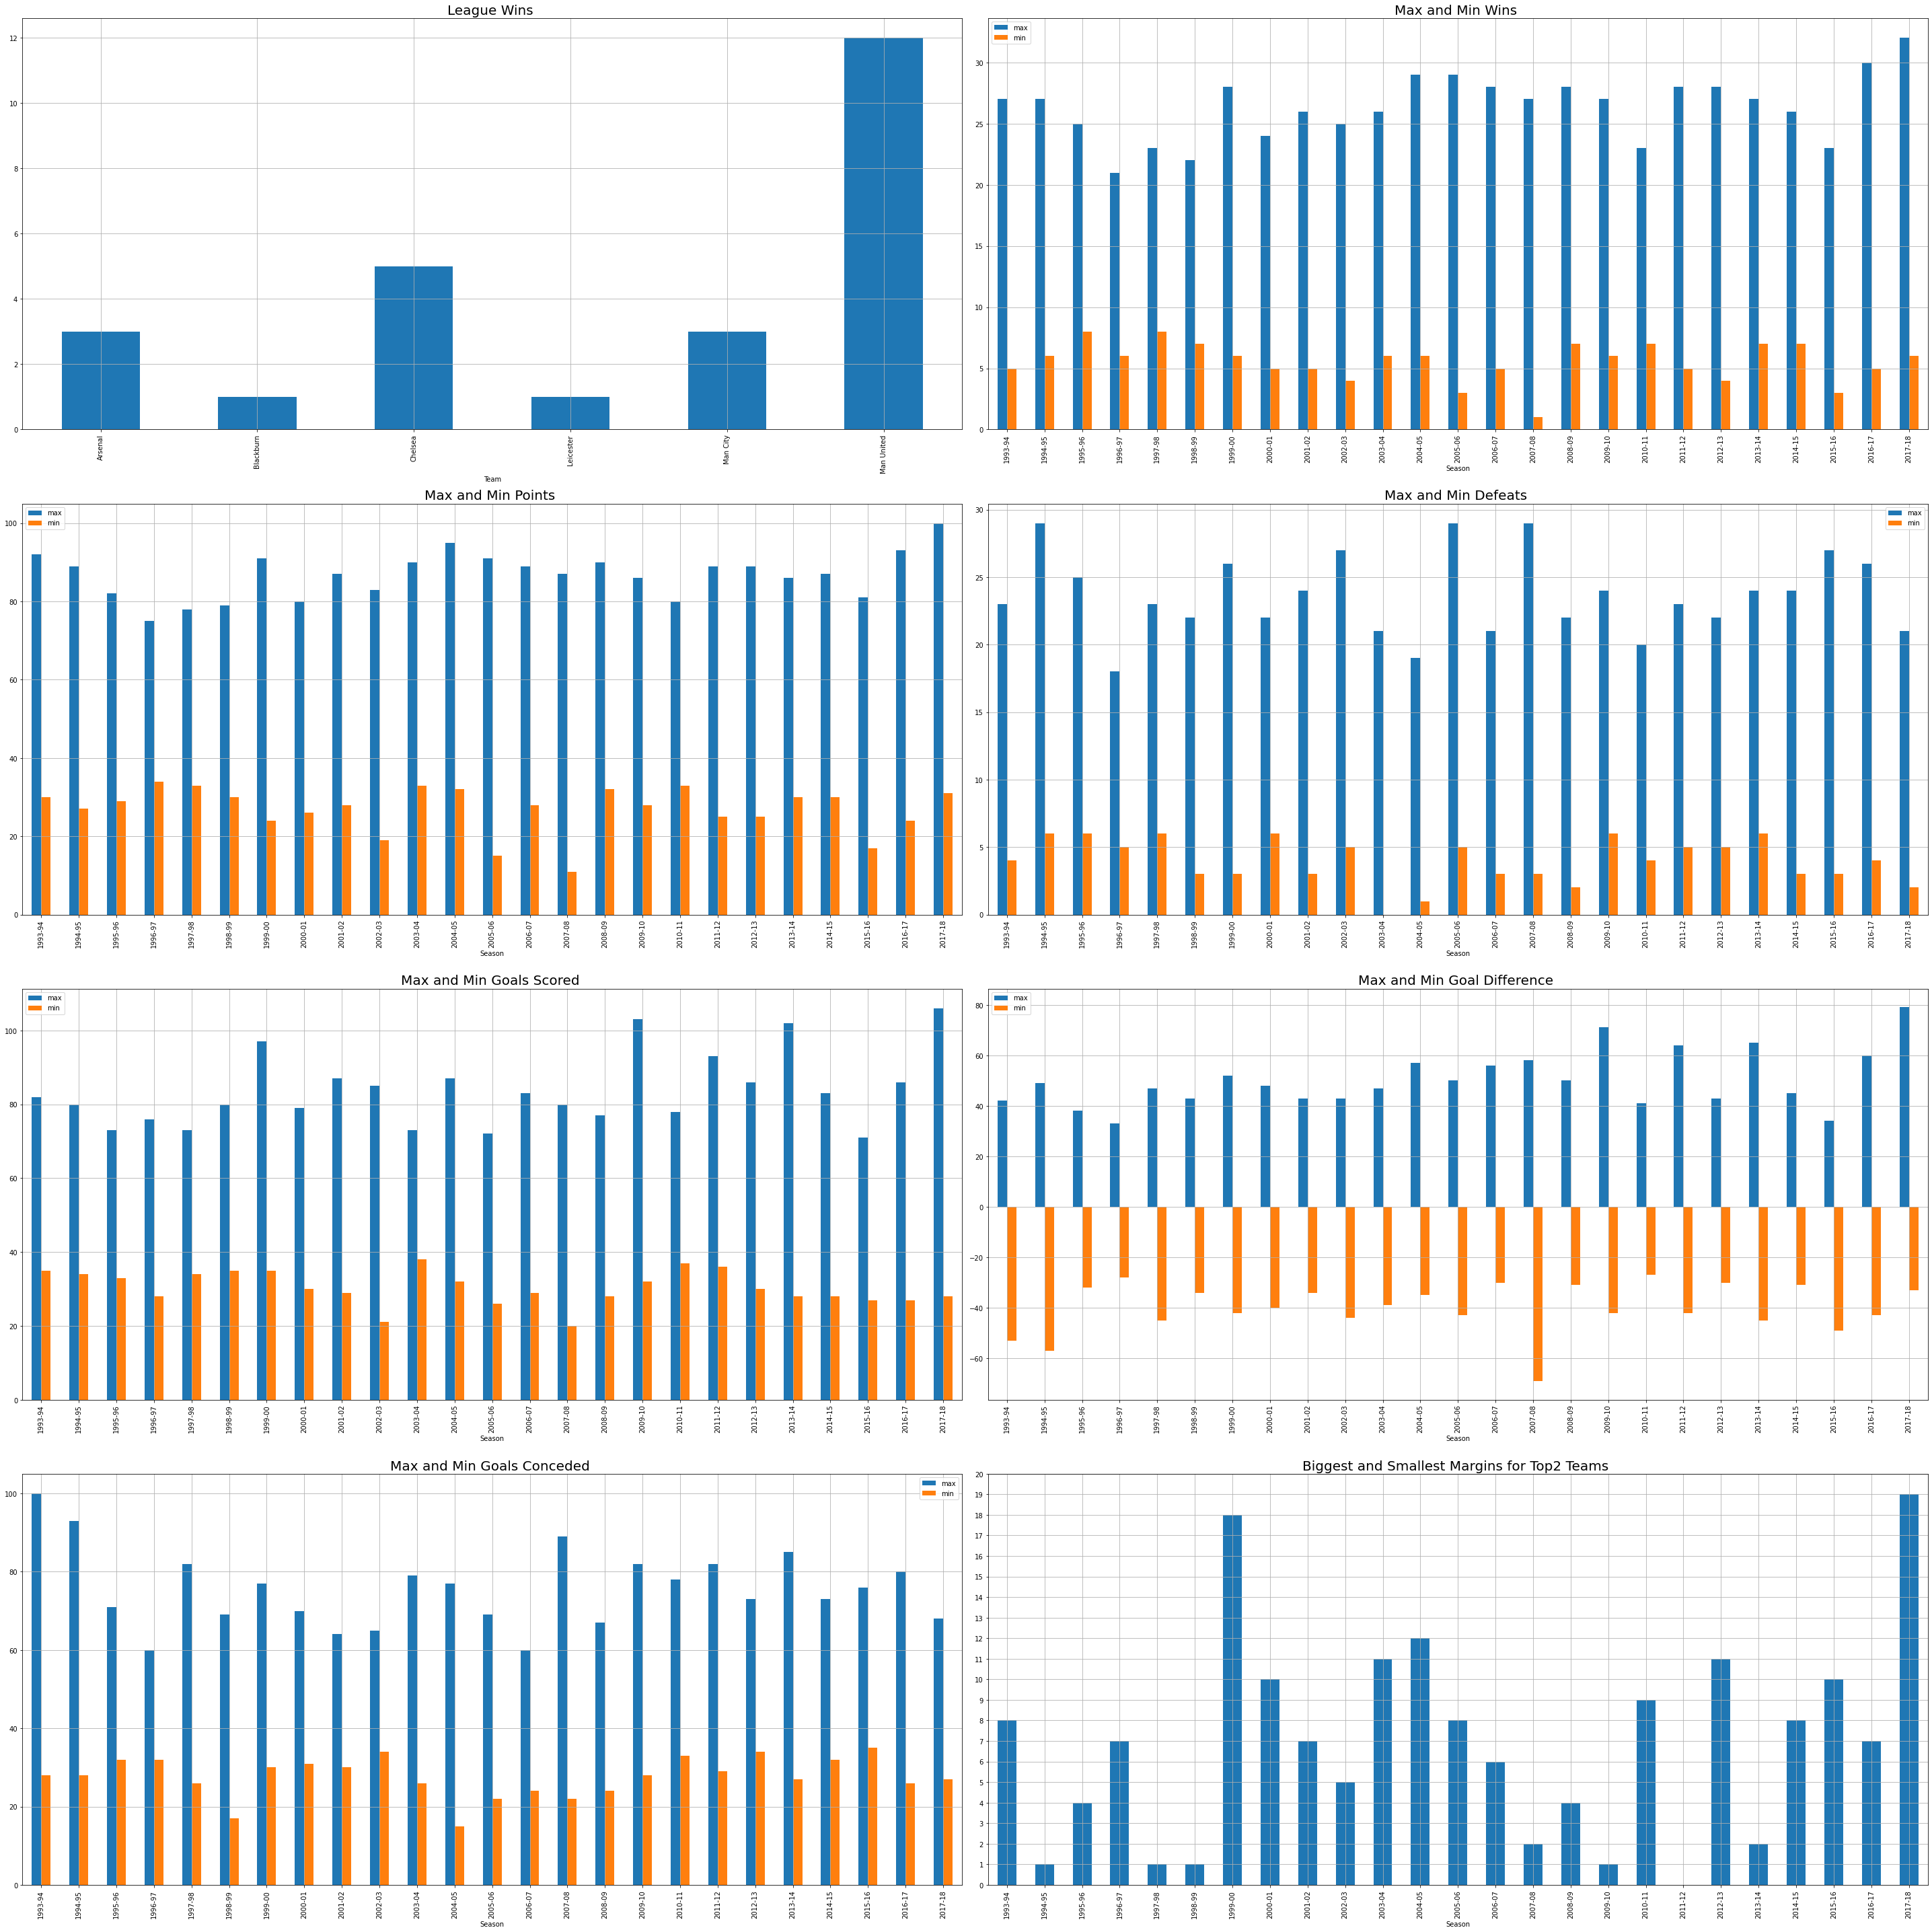

In [43]:
fig,ax=plt.subplots(4,2,figsize=(40,40),constrained_layout=True)

## Most and Least Premier League wins (minimum 1)
pt_table[pt_table['Rank']==1].groupby('Team')['Season'].count().plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('League Wins ',fontsize=20)
ax[0][0].grid()

##Most and Least Wins in a season
pt_table.groupby('Season')['Total Wins'].agg(['max','min']).plot(kind='bar',ax=ax[0][1])
ax[0][1].set_title('Max and Min Wins ',fontsize=20)
ax[0][1].grid()

##Most and Least Points in a season
pt_table.groupby('Season')['Total_Points'].agg(['max','min']).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('Max and Min Points ',fontsize=20)
ax[1][0].grid()

##Most and Least Defeats in a season
pt_table.groupby('Season')['Total Loss'].agg(['max','min']).plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('Max and Min Defeats ',fontsize=20)
ax[1][1].grid()

##Most and Least Goals in a season
pt_table.groupby('Season')['GF'].agg(['max','min']).plot(kind='bar',ax=ax[2][0])
ax[2][0].set_title('Max and Min Goals Scored ',fontsize=20)
ax[2][0].grid()

##Best and worst Goal Difference in a season
pt_table.groupby('Season')['GD'].agg(['max','min']).plot(kind='bar',ax=ax[2][1])
ax[2][1].set_title('Max and Min Goal Difference ',fontsize=20)
ax[2][1].grid()

##Most and Least Goals Conceded in a season
pt_table.groupby('Season')['GA'].agg(['max','min']).plot(kind='bar',ax=ax[3][0])
ax[3][0].set_title('Max and Min Goals Conceded ',fontsize=20)
ax[3][0].grid()

##Biggest and Smallest Margin between top 2 teams over Seasons

## Top Team Data for every Season to see trending
top = pt_table[(pt_table['Rank']==1)]
top.set_index('Season',drop=True,inplace=True)
top = top.reset_index() ##set and reset done becuase otherwise it was showing irregular spaces in x axis of the plot

## Runner Up Team Data for every Season to see trending
rup = pt_table[(pt_table['Rank']==2)]
rup.set_index('Season',drop=True,inplace=True)
rup = rup.reset_index() ##set and reset done becuase otherwise it was showing irregular spaces in x axis of the plot

top.set_index('Season',inplace=True)
rup.set_index('Season',inplace=True)

(top['Total_Points'] - rup['Total_Points']).plot(kind='bar',ax=ax[3][1],yticks=np.arange(0,21,1))
ax[3][1].set_title('Biggest and Smallest Margins for Top2 Teams ',fontsize=20)
ax[3][1].grid()

top.reset_index(inplace=True)
rup.reset_index(inplace=True)

fig.tight_layout()
fig.show()

### Observations 
#### Amonng the teams which have won the league ever in history, Man United have won the league most no. of times (12) while Blackburn and Leicester have won the league least (1) time.
#### Maximum Wins in a single season is in Season 2017-18 (32) while Minimum Wins is in Season 2007-08 (1)
#### Maximum Points in a single season is in Season 2017-18 (100) while Minimum Points is in Season 2007-08 (11)
#### Most Defeats in a Season is in Season 1994-95 , 2005-06 and 2007-08 (29) while the Least Defeats is in Season 2003-04 (0)
#### Maximum Goals in a single season is in Season 2017-18 (106) while Minimum Goals is in Season 2007-08 (20)
#### Maximum Goal Difference in a single season is in Season 2017-18 (79) while Minimum Goal Difference is in Season 2007-08 (-69)
#### Maximum Goals Conceded in a single season is in Season 1993-94 (100) while Minimum Goals Conceded is in Season 2004-05 (15)
#### The Biggest Margin between top 2 teams is of 19 Points in the season 2017-18
#### The Smallest Margin between top 2 teams is of 0 Points in the season 2011-12 and the winner was decided on the basis of Goal Difference (As per Premier League Rules and the same is applied while building the Points Table above)